In [1]:
# create dummy 1000 circles from scikit

from sklearn.datasets import make_circles

# make 1000 circles
n_samples = 1000

# create circles - make a larger circle containing a smaller one in 2D
X,y = make_circles(
    n_samples,
    noise=0.03,
    random_state=42 # for reproducibility
)

In [2]:
# the features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [3]:
# the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

`visualize the data`

In [4]:
import pandas as pd 
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
# get the first axis for X1 and the second axis for X2
circles.head(5)

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


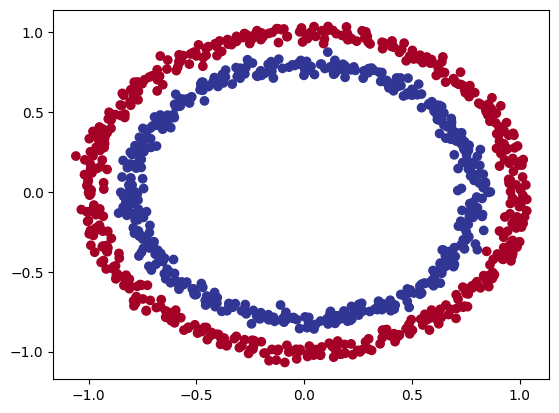

In [5]:
import matplotlib.pyplot as plt 
plt.scatter(X[:,0], X[:,1],c=y,cmap=plt.cm.RdYlBu)

`check the shapes of our features and labels`

In [6]:
X.shape, y.shape # y are scalers

((1000, 2), (1000,))

In [7]:
len(X), len(y)

(1000, 1000)

In [8]:
# what is our first example like
X[5], y[5]
# given the two inputs, can we get the output - classify as a zero or a one

(array([-0.47964637,  0.67643477]), 1)

`Build a Neural Net to Classify either into blue or red circle`

In [9]:
import tensorflow as tf 
import numpy as np

2023-01-11 13:45:27.707998: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
# convert our numpy array into tensors
X = tf.constant(X)
y = tf.constant(y)

2023-01-11 13:45:29.997809: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
# X,y # they are now tensors
X.dtype, y.dtype

(tf.float64, tf.int64)

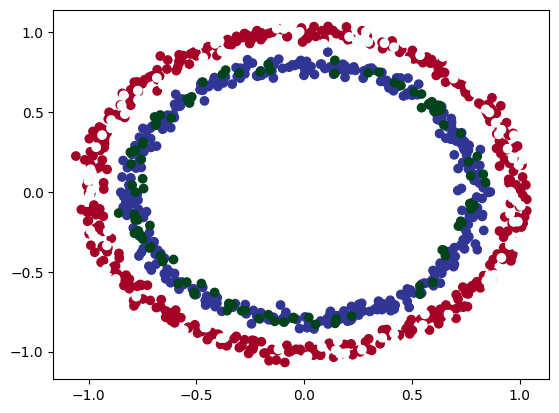

In [12]:
X_train = X[:800]
y_train = y[:800]

X_test = X[800:]
y_test = y[800:]

plt.scatter(X_train[:,0], X_train[:,1],c=y_train,cmap=plt.cm.RdYlBu)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test,cmap=plt.cm.BuGn)

In [13]:
# # using sckit to split our data - pops dtype error
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [16]:
# 1. set random seed
tf.random.set_seed(42)

# 2. create a model using the Sequential API
model = tf.keras.Sequential(
    [
        # tf.keras.Input(shape=(224,224,3)),
        tf.keras.layers.Dense(100, activation='relu'), # rectifier linear unit
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
) 

# 3. Compile the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.035), 
    metrics = 'accuracy' # accuracy - out of 100 examples, how many did our model get right?
)

# 3b Instantiate an EarlyStopping callback
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5)

# 4. fit the model
model_def = model.fit(X_train, y_train, epochs=150, verbose=2, callbacks=[callback])

Epoch 1/150
25/25 - 1s - loss: 0.6812 - accuracy: 0.5813 - 1s/epoch - 45ms/step
Epoch 2/150
25/25 - 0s - loss: 0.6114 - accuracy: 0.6600 - 53ms/epoch - 2ms/step
Epoch 3/150
25/25 - 0s - loss: 0.4840 - accuracy: 0.8238 - 53ms/epoch - 2ms/step
Epoch 4/150
25/25 - 0s - loss: 0.3301 - accuracy: 0.9312 - 50ms/epoch - 2ms/step
Epoch 5/150
25/25 - 0s - loss: 0.1932 - accuracy: 0.9862 - 53ms/epoch - 2ms/step
Epoch 6/150
25/25 - 0s - loss: 0.1258 - accuracy: 0.9925 - 54ms/epoch - 2ms/step
Epoch 7/150
25/25 - 0s - loss: 0.0930 - accuracy: 0.9975 - 56ms/epoch - 2ms/step
Epoch 8/150
25/25 - 0s - loss: 0.0641 - accuracy: 0.9987 - 51ms/epoch - 2ms/step
Epoch 9/150
25/25 - 0s - loss: 0.0493 - accuracy: 0.9987 - 59ms/epoch - 2ms/step
Epoch 10/150
25/25 - 0s - loss: 0.0404 - accuracy: 0.9987 - 62ms/epoch - 2ms/step
Epoch 11/150
25/25 - 0s - loss: 0.0338 - accuracy: 1.0000 - 104ms/epoch - 4ms/step
Epoch 12/150
25/25 - 0s - loss: 0.0271 - accuracy: 1.0000 - 122ms/epoch - 5ms/step
Epoch 13/150
25/25 - 0s 

In [17]:
# see for how long the thing ran before being callback was initiated
len(model_def.history['accuracy'])

16

In [ ]:
# plot the training before stopping occured
pd.DataFrame(model_def.history).plot(figsize=4,7)
plt.xlabel('loss')
plt.ylabel('epochs')

In [15]:
model.summary()
model.evaluate(X_test, y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (32, 100)                 300       
                                                                 
 dense_1 (Dense)             (32, 1)                   101       
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________
7/7 [==============================] - 0s 2ms/step - loss: 0.0483 - accuracy: 0.9900


[0.048309314996004105, 0.9900000095367432]